In [0]:
# Reading non-symmetric input data

df = pd.read_csv('SA_AAL_rg.csv')
for column in df:
    if df[column].dtype == np.object_:
        df[column] = df[column].str.replace('\+AC0-', '-').astype(float)
df = df.fillna(1)
df.head()

FileNotFoundError: ignored

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

In [0]:
# Removing values <0, > 1 and thresholding (if needed)

for i in range(78):
    for j in range(78):
        if df.iloc[i,j] < 0:
            df.iloc[i,j] = 0
        if df.iloc[i,j] > 1:
            df.iloc[i,j] = 1
        # Thresholding
        #if df.iloc[i,j] < 0.5:
         #   df.iloc[i,j] = 0
df.head()

,PreCG+AF8-L+AF8-SA,SFGdor+AF8-L+AF8-SA,ORBsup+AF8-L+AF8-SA,MFG+AF8-L+AF8-SA,ORBmid+AF8-L+AF8-SA,IFGoperc+AF8-L+AF8-SA,IFGtriang+AF8-L+AF8-SA,ORBinf+AF8-L+AF8-SA,ROL+AF8-L+AF8-SA,SMA+AF8-L+AF8-SA,...,SMG+AF8-R+AF8-SA,ANG+AF8-R+AF8-SA,PCUN+AF8-R+AF8-SA,PCL+AF8-R+AF8-SA,HES+AF8-R+AF8-SA,STG+AF8-R+AF8-SA,TPOsup+AF8-R+AF8-SA,MTG+AF8-R+AF8-SA,TPOmid+AF8-R+AF8-SA,ITG+AF8-R+AF8-SA
0,1.000000,0.784238,0.629777,0.890097,0.832424,0.933154,0.548034,0.728044,0.672902,0.750941,...,0.508362,0.491821,0.571127,0.692164,0.999954,0.594443,0.687678,0.715770,1.000000,0.704727
1,0.784238,1.000000,0.687242,0.895069,0.999978,0.909066,0.528547,0.625199,0.563026,0.863614,...,0.251759,0.522575,0.629081,0.828654,0.999793,0.639218,0.575672,0.686880,0.999917,0.549691
2,0.629777,0.687242,1.000000,0.799320,1.000000,0.991127,0.622488,0.894325,0.823488,0.778884,...,0.502731,0.586074,0.845775,0.806240,1.000000,0.999972,0.643088,0.652312,0.999994,0.817198
3,0.890097,0.895069,0.799320,1.000000,0.716031,0.872615,0.993362,0.994414,0.599904,0.916665,...,0.790178,0.526830,0.660794,0.828353,0.999747,0.597569,0.731769,0.730992,0.999996,0.719055
4,0.832424,0.999978,1.000000,0.716031,1.000000,0.960506,0.000000,1.000000,0.697320,0.999995,...,0.483538,0.803410,0.771810,0.941510,0.999999,0.173535,0.706281,0.691096,0.982094,0.999997


In [0]:
# Inverting the data
    # looking at dissim instead of sim
    # same as agglomerating vs. separating data
for i in range(78):
    for j in range(78):
        a = df.iloc[i,j]
        df.iloc[i,j] = 1-a
df.head()

,PreCG+AF8-L+AF8-SA,SFGdor+AF8-L+AF8-SA,ORBsup+AF8-L+AF8-SA,MFG+AF8-L+AF8-SA,ORBmid+AF8-L+AF8-SA,IFGoperc+AF8-L+AF8-SA,IFGtriang+AF8-L+AF8-SA,ORBinf+AF8-L+AF8-SA,ROL+AF8-L+AF8-SA,SMA+AF8-L+AF8-SA,...,SMG+AF8-R+AF8-SA,ANG+AF8-R+AF8-SA,PCUN+AF8-R+AF8-SA,PCL+AF8-R+AF8-SA,HES+AF8-R+AF8-SA,STG+AF8-R+AF8-SA,TPOsup+AF8-R+AF8-SA,MTG+AF8-R+AF8-SA,TPOmid+AF8-R+AF8-SA,ITG+AF8-R+AF8-SA
0,0.000000,0.215762,3.702234e-01,0.109903,1.675757e-01,0.066846,0.451966,2.719563e-01,0.327098,0.249059,...,0.491638,0.508179,0.428873,0.307836,4.556425e-05,0.405557,0.312322,0.284230,1.379169e-08,0.295273
1,0.215762,0.000000,3.127582e-01,0.104931,2.152966e-05,0.090934,0.471453,3.748006e-01,0.436974,0.136386,...,0.748241,0.477425,0.370919,0.171346,2.069293e-04,0.360782,0.424328,0.313120,8.323799e-05,0.450309
2,0.370223,0.312758,0.000000e+00,0.200680,1.754758e-07,0.008873,0.377512,1.056752e-01,0.176512,0.221116,...,0.497269,0.413926,0.154225,0.193760,1.707452e-07,0.000028,0.356912,0.347688,6.133332e-06,0.182802
3,0.109903,0.104931,2.006800e-01,0.000000,2.839689e-01,0.127385,0.006638,5.586027e-03,0.400096,0.083335,...,0.209822,0.473170,0.339206,0.171647,2.534004e-04,0.402431,0.268231,0.269008,3.588437e-06,0.280945
4,0.167576,0.000022,1.754758e-07,0.283969,0.000000e+00,0.039494,1.000000,5.015427e-08,0.302680,0.000005,...,0.516462,0.196590,0.228190,0.058490,6.092189e-07,0.826465,0.293719,0.308904,1.790595e-02,0.000003


In [0]:
# Making dataset symmetric

for i in range(78):
    for j in range(i+1):
        df.iloc[j,i] = df.iloc[i,j]
df.head()

,PreCG+AF8-L+AF8-SA,SFGdor+AF8-L+AF8-SA,ORBsup+AF8-L+AF8-SA,MFG+AF8-L+AF8-SA,ORBmid+AF8-L+AF8-SA,IFGoperc+AF8-L+AF8-SA,IFGtriang+AF8-L+AF8-SA,ORBinf+AF8-L+AF8-SA,ROL+AF8-L+AF8-SA,SMA+AF8-L+AF8-SA,...,SMG+AF8-R+AF8-SA,ANG+AF8-R+AF8-SA,PCUN+AF8-R+AF8-SA,PCL+AF8-R+AF8-SA,HES+AF8-R+AF8-SA,STG+AF8-R+AF8-SA,TPOsup+AF8-R+AF8-SA,MTG+AF8-R+AF8-SA,TPOmid+AF8-R+AF8-SA,ITG+AF8-R+AF8-SA
0,0.000000,0.215762,3.702234e-01,0.109903,1.675757e-01,0.066846,0.451966,2.719563e-01,0.327098,0.249059,...,0.491638,0.508179,0.428873,0.307836,4.556425e-05,0.405557,0.312322,0.284230,1.379169e-08,0.295273
1,0.215762,0.000000,3.127582e-01,0.104931,2.152966e-05,0.090934,0.471453,3.748006e-01,0.436974,0.136386,...,0.748241,0.477425,0.370919,0.171346,2.069293e-04,0.360782,0.424328,0.313120,8.323799e-05,0.450309
2,0.370223,0.312758,0.000000e+00,0.200680,1.754758e-07,0.008873,0.377512,1.056752e-01,0.176512,0.221116,...,0.497269,0.413926,0.154225,0.193760,1.707452e-07,0.000028,0.356912,0.347688,6.133332e-06,0.182802
3,0.109903,0.104931,2.006800e-01,0.000000,2.839689e-01,0.127385,0.006638,5.586027e-03,0.400096,0.083335,...,0.209822,0.473170,0.339206,0.171647,2.534004e-04,0.402431,0.268231,0.269008,3.588437e-06,0.280945
4,0.167576,0.000022,1.754758e-07,0.283969,0.000000e+00,0.039494,1.000000,5.015427e-08,0.302680,0.000005,...,0.516462,0.196590,0.228190,0.058490,6.092189e-07,0.826465,0.293719,0.308904,1.790595e-02,0.000003


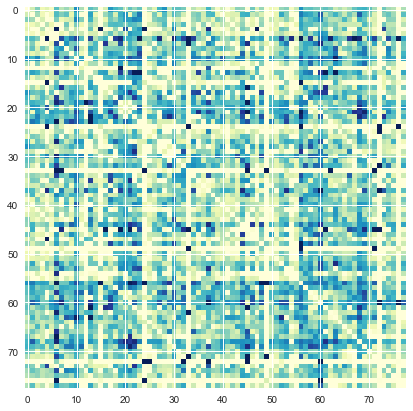

In [0]:
# Heatmap of the data

fig= plt.figure(figsize=(7,7))
plt.imshow(df, cmap='YlGnBu', interpolation='nearest')
plt.show()

/anaconda3/lib/python3.6/site-packages/seaborn/matrix.py:603: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


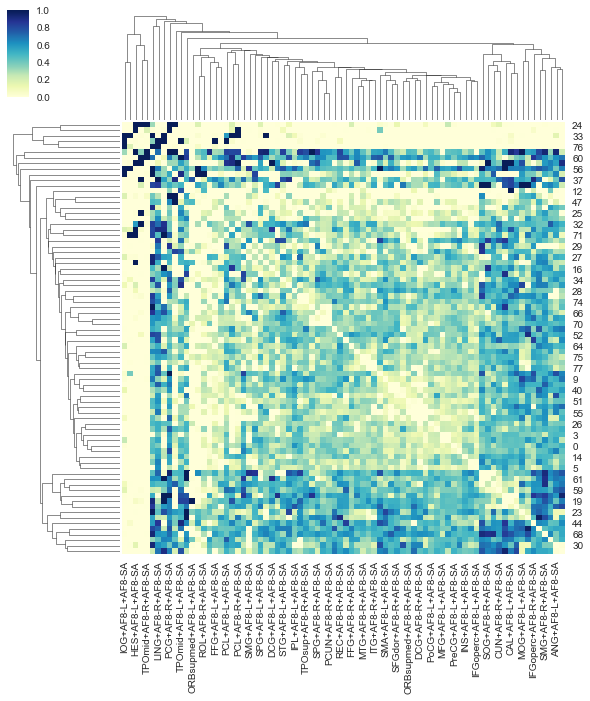

In [0]:
# Clustering: 

import seaborn as sns; sns.set(color_codes=True) # default is Euclidian
# EX: from sklearn.cluster import AgglomerativeClustering
g = sns.clustermap(df, method='average',cmap='YlGnBu') # try single, ward, complete method as well

In [0]:
help(sns.clustermap)

Help on function clustermap in module seaborn.matrix:

clustermap(data, pivot_kws=None, method='average', metric='euclidean', z_score=None, standard_scale=None, figsize=None, cbar_kws=None, row_cluster=True, col_cluster=True, row_linkage=None, col_linkage=None, row_colors=None, col_colors=None, mask=None, **kwargs)
    Plot a matrix dataset as a hierarchically-clustered heatmap.
    
    Parameters
    ----------
    data: 2D array-like
        Rectangular data for clustering. Cannot contain NAs.
    pivot_kws : dict, optional
        If `data` is a tidy dataframe, can provide keyword arguments for
        pivot to create a rectangular dataframe.
    method : str, optional
        Linkage method to use for calculating clusters.
        See scipy.cluster.hierarchy.linkage documentation for more information:
        http://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
    metric : str, optional
        Distance metric to use for the data. See
        s

In [0]:
from scipy.cluster.hierarchy import dendrogram, linkage

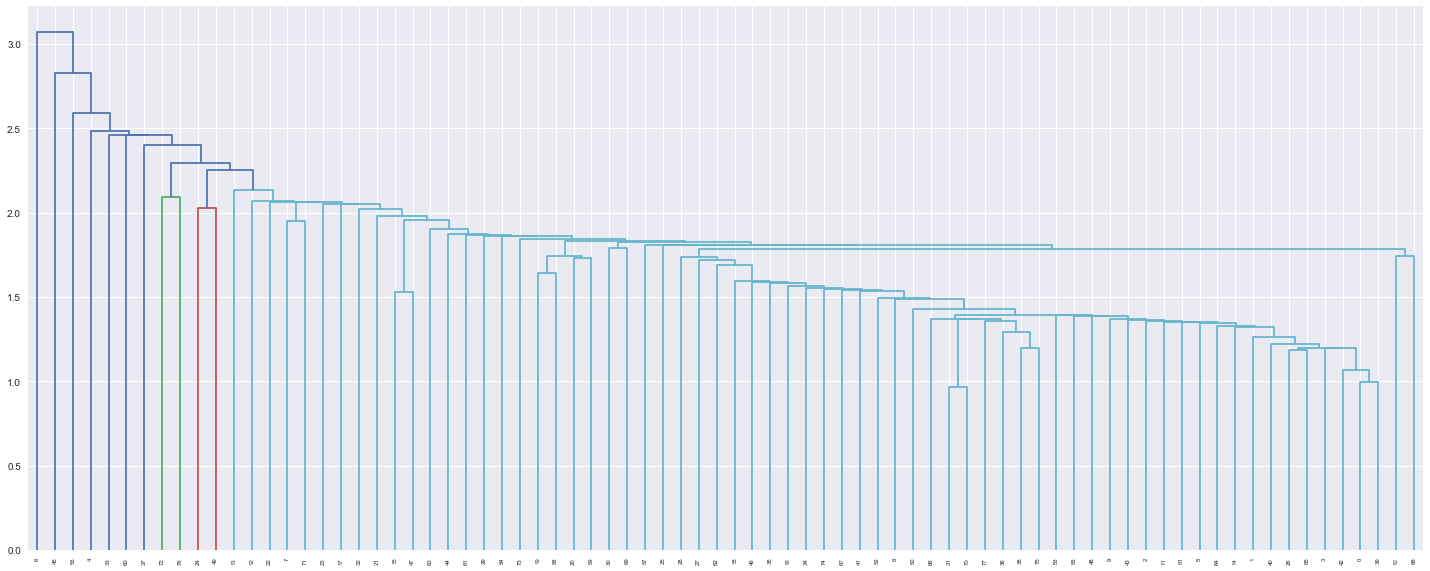

In [0]:
a = cluster.hierarchy.linkage(df,'single')
fig = plt.figure(figsize=(25, 10))
#dn = dendrogram(a,truncate_mode='lastp')
dn = dendrogram(a)
plt.show()

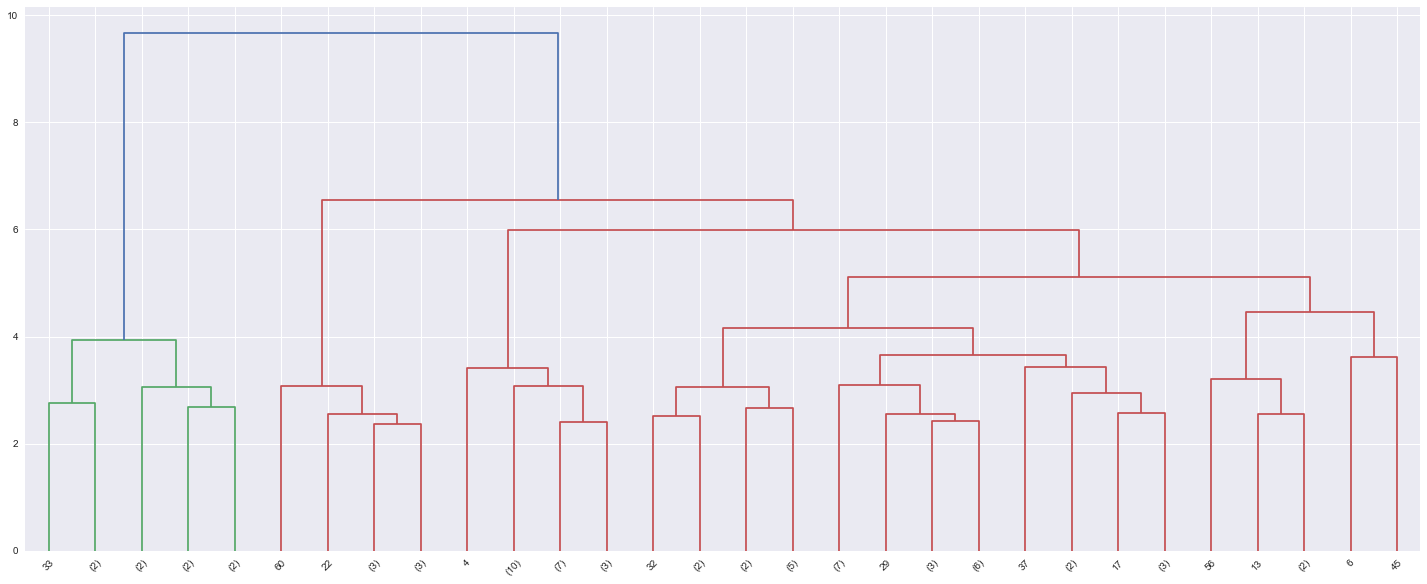

In [0]:
a = cluster.hierarchy.linkage(df,'ward')
fig = plt.figure(figsize=(25, 10))
#dn = dendrogram(a)
dn = dendrogram(a,truncate_mode='lastp')
plt.show()